<a href="https://colab.research.google.com/github/tuanymariiah/data_analysis/blob/main/Consumo_de_cerveja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sns.set()


In [2]:
file = 'https://raw.githubusercontent.com/tuanymariiah/data_analysis/main/Bases/Consumo_cerveja.csv?token=AG2B7L7OXCU33OBQDRA36C3BCFIG4'
base_beer = pd.read_csv(file)

 Apresentacao do dataset
* Data - data da coleta                    
* Temperatura Media (C) - temperatura média daquele dia  
* Temperatura Minima (C) - temperatura mínima daquele dia
* Temperatura Maxima (C) - temperatura máxima daquele dia        
* Precipitacao (mm) - ?    
* Final de Semana - marca 0 ou 1 se aquela data cai em um final de semana               
* Consumo de cerveja (litros) - variável de saída

verificacao de valores ausentes


In [3]:
base_beer.isna().sum()

Data                           576
Temperatura Media (C)          576
Temperatura Minima (C)         576
Temperatura Maxima (C)         576
Precipitacao (mm)              576
Final de Semana                576
Consumo de cerveja (litros)    576
dtype: int64

exclusao dos valores ausentes

In [4]:
base_beer=base_beer.dropna()
base_beer.isna().sum()

Data                           0
Temperatura Media (C)          0
Temperatura Minima (C)         0
Temperatura Maxima (C)         0
Precipitacao (mm)              0
Final de Semana                0
Consumo de cerveja (litros)    0
dtype: int64

Para uma análise exploratória desses dados tracei algumas coisas interessantes a se observar, como:
* temperatura máxima e mínima do ambiente
* Qual o mes de maior consumo de cerveja
* Em qual temperatura houve maior consumo de cerveja
* verificar os outlier
* a correlacao do consumo de cerveja e os demais atributos

qual a temperatura máxima da cerveja?

In [5]:
print('Temperatura máxima (máxima) do ambiente: ',base_beer['Temperatura Maxima (C)'].max())
print('Temperatura máxima (minima) do ambiente: ',base_beer['Temperatura Maxima (C)'].min())

print('Temperatura mínima (máxima) do ambiente: ',base_beer['Temperatura Minima (C)'].max())
print('Temperatura mínima (mínima) do ambiente: ',base_beer['Temperatura Minima (C)'].min())

print('Temperatura média (máxima) do ambiente: ',base_beer['Temperatura Media (C)'].max())
print('Temperatura média (mínima) do ambiente: ',base_beer['Temperatura Media (C)'].min())


Temperatura máxima (máxima) do ambiente:  36,5
Temperatura máxima (minima) do ambiente:  14,5
Temperatura mínima (máxima) do ambiente:  24,5
Temperatura mínima (mínima) do ambiente:  10,6
Temperatura média (máxima) do ambiente:  28,86
Temperatura média (mínima) do ambiente:  12,9


com isso podemos ver que a temperatura máxima do ambiente, ou seja da cidade de SP, varia entre 14.5 e 36.5 graus e que a temperatura mínima varia entre de 10.6 e 24.5. 

quantidade de bebidas alcoolicas ingeridas nos finais de semana?

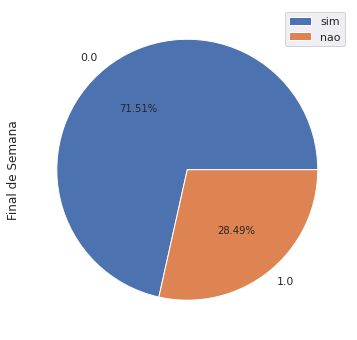

In [6]:
base_beer['Final de Semana'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=[6,6]);

plt.legend(['sim', 'nao']);

de acordo com o grafico acima, nos finais de semana é possível ver um consumo maior de cerveja.

Como ja retiramos os valores ausentes, podemos normalizar o dataset, assim, todas as amostras ficaram na mesma escala, mas antes vamos separar será nosso X e nosso y

O atributo data será removido pois ele não é um atributo interessante para nossa base de dados

In [8]:
base_beer.drop('Data', axis=1, inplace=True)
colum=['Temperatura Media (C)','Temperatura Minima (C)','Temperatura Maxima (C)','Precipitacao (mm)']
base_beer[colum] = base_beer[colum].apply(lambda x: x.str.replace(',', '.'))
base_beer = base_beer.apply(pd.to_numeric)


In [9]:
X = base_beer.drop(['Consumo de cerveja (litros)'],axis=1)
y = base_beer['Consumo de cerveja (litros)']

In [10]:
base_beer_normalizado = MinMaxScaler().fit_transform(X)


In [11]:
#dividindo a base
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)